In [2]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

import xgboost
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor   
import xgboost as xgb
#from mlxtend.classifier import StackingRegressor
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
#import required packages
from sklearn import neighbors

##Pandas Profiling
import pandas_profiling

## Model Selection
from sklearn.model_selection import cross_val_score

## Logistic model
from sklearn.linear_model import LogisticRegression, LinearRegression

## KNN
from sklearn.neighbors import KNeighborsClassifier

##Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

## Decision Tree
from sklearn.tree import DecisionTreeClassifier

## Random Forest
from sklearn.ensemble import RandomForestClassifier

## Random forest Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

## Random forest Stacking
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import StackingClassifier

## Random forest Voting 
from sklearn.ensemble import VotingClassifier


##Metrics for Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

## Warnings
import warnings
warnings.simplefilter('ignore')

In [192]:
#Library install 
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\programdata\anaconda3\lib\site-packages (2.9.0)


In [193]:
!dir

 Volume in drive C is Windows8_OS
 Volume Serial Number is 3E34-6A6E

 Directory of C:\Users\Lakshmisaravanan\Desktop\Machine Learning Class\Machine Learning Tumor Hackathon

13-12-2020  11:52    <DIR>          .
13-12-2020  11:52    <DIR>          ..
12-12-2020  21:50    <DIR>          .ipynb_checkpoints
13-12-2020  11:49           701,492 Linear_Regression_Tumor_latest.csv
12-12-2020  21:48           666,057 sample_submission.csv
12-12-2020  21:48         2,834,996 Test.csv
12-12-2020  21:48           794,923 Train.csv
13-12-2020  11:52         9,614,524 Tumor Prediction.ipynb
13-12-2020  11:50           387,926 Tumor_XGBoost_predictio.csv
               6 File(s)     14,999,918 bytes
               3 Dir(s)  260,844,032,000 bytes free


In [3]:
## read the file 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

In [4]:
train.head()

mass_npea  size_npear  malign_ratio  damage_size  exposed_area  \
0    6930.90     2919.02       0.42116      51.8298  9.888294e+05   
1   15635.70     4879.36       0.31206     223.5500  2.058426e+06   
2   10376.20     2613.88       0.25191     127.3370  1.434676e+06   
3   13093.80     4510.06       0.34444     155.4400  1.812195e+06   
4    7545.21     2882.36       0.38201      85.1237  1.043918e+06   

   std_dev_malign  err_malign  malign_penalty  damage_ratio  tumor_size  
0         109.487     2758.76              72       39.3620      14.103  
1         248.881     5952.53             240       22.0253       2.648  
2         160.093     4635.26              73       29.9963       1.688  
3         173.015     5273.87              32       28.1354       3.796  
4         124.414     3263.35              57       35.0200      18.023

In [5]:
train["source"] = "train"
test["source"] = "test"

In [6]:
## concatentae the train and test data frame
df = pd.concat([train,test])

In [8]:
pandas_profiling.ProfileReport(df)

In [ ]:
pd.crosstab(df["size_npear"], df["tumor_size"]).plot(kind = "bar", figsize=(20,10))
plt.title('Response of the Insurance', fontsize = 30)
plt.xlabel("size_npear", fontsize = 30) 
plt.ylabel('tumor_size', fontsize = 30)

Exception ignored in sys.unraisablehook: <built-in function unraisablehook>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\iostream.py", line 387, in write
    if self.echo is not None:
KeyboardInterrupt


In [7]:
df.corr()

mass_npea  size_npear  malign_ratio  damage_size  \
mass_npea        1.000000    0.906606      0.126285     0.931056   
size_npear       0.906606    1.000000      0.502562     0.793143   
malign_ratio     0.126285    0.502562      1.000000     0.031230   
damage_size      0.931056    0.793143      0.031230     1.000000   
exposed_area     0.998185    0.902853      0.122622     0.925707   
std_dev_malign   0.967531    0.908354      0.200650     0.938108   
err_malign       0.554002    0.515929      0.080064     0.485185   
malign_penalty   0.651251    0.584242      0.095340     0.676919   
damage_ratio    -0.898240   -0.786188     -0.069039    -0.891766   
tumor_size      -0.004679    0.164761      0.374273    -0.163804   

                exposed_area  std_dev_malign  err_malign  malign_penalty  \
mass_npea           0.998185        0.967531    0.554002        0.651251   
size_npear          0.902853        0.908354    0.515929        0.584242   
malign_ratio        0.122622        0.200650    0.080064        0.095340   
damage_size         0.925707        0.938108    0.485185        0.676919   
exposed_area        1.000000        0.961769    0.553729        0.642961   
std_dev_malign      0.961769        1.000000    0.538198        0.662584   
err_malign          0.553729        0.538198    1.000000        0.347030   
malign_penalty      0.642961        0.662584    0.347030        1.000000   
damage_ratio       -0.897765       -0.881973   -0.521148       -0.637287   
tumor_size         -0.003641       -0.030085    0.004484        0.011871   

                damage_ratio  tumor_size  
mass_npea          -0.898240   -0.004679  
size_npear         -0.786188    0.164761  
malign_ratio       -0.069039    0.374273  
damage_size        -0.891766   -0.163804  
exposed_area       -0.897765   -0.003641  
std_dev_malign     -0.881973   -0.030085  
err_malign         -0.521148    0.004484  
malign_penalty     -0.637287    0.011871  
damage_ratio        1.000000    0.054892  
tumor_size          0.054892    1.000000

In [8]:
train.describe()

mass_npea    size_npear  malign_ratio  damage_size  exposed_area  \
count   9146.000000   9146.000000   9146.000000  9146.000000  9.146000e+03   
mean    9903.052174   3032.827837      0.303083   103.902118  1.372442e+06   
std     4060.577116   1462.334147      0.062533    55.456862  5.646773e+05   
min     2864.760000    510.530000      0.114820    10.310100  3.878534e+05   
25%     6988.420000   1983.657500      0.259053    64.012525  9.596873e+05   
50%     8895.965000   2684.330000      0.301055    88.458300  1.237057e+06   
75%    12119.950000   3830.745000      0.343002   134.209000  1.693083e+06   
max    36995.400000  13535.000000      0.525300   346.420000  4.978616e+06   

       std_dev_malign    err_malign  malign_penalty  damage_ratio   tumor_size  
count     9146.000000   9146.000000     9146.000000   9146.000000  9146.000000  
mean       146.304239   3992.936256       69.849661     34.461652     7.723348  
std         70.512177   1780.672859       55.785332      5.972808     6.086852  
min         31.970400   1089.190000        0.000000     15.228000     0.000000  
25%         95.853900   3177.682500       31.000000     30.290225     2.320000  
50%        126.138500   3846.320000       54.000000     35.245750     5.060500  
75%        182.251500   4664.577500       91.000000     38.806075    13.336000  
max        528.890000  91983.700000      340.000000     46.546400    20.999000

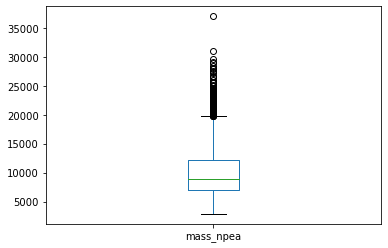

In [9]:
train["mass_npea"].plot(kind = "box")

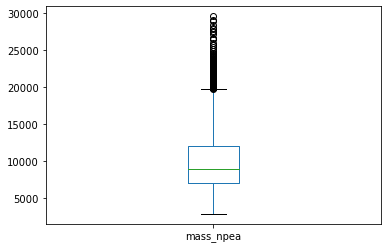

In [10]:
train_new = train[(train.mass_npea < 30000)]
train_new["mass_npea"].plot(kind = "box")

In [11]:
train_new.shape

(9144, 11)

In [12]:
train.shape

(9146, 11)

In [13]:
train_preprocessed = df[df["source"]=="train"]

In [14]:
train_X = train_preprocessed.drop(columns = ["tumor_size", "source", "malign_ratio", "damage_ratio"])

In [15]:
train_y = train_preprocessed[["tumor_size"]]

In [16]:
train_X.head()

mass_npea  size_npear  damage_size  exposed_area  std_dev_malign  \
0    6930.90     2919.02      51.8298  9.888294e+05         109.487   
1   15635.70     4879.36     223.5500  2.058426e+06         248.881   
2   10376.20     2613.88     127.3370  1.434676e+06         160.093   
3   13093.80     4510.06     155.4400  1.812195e+06         173.015   
4    7545.21     2882.36      85.1237  1.043918e+06         124.414   

   err_malign  malign_penalty  
0     2758.76              72  
1     5952.53             240  
2     4635.26              73  
3     5273.87              32  
4     3263.35              57

In [17]:
test_preprocessed = test[test["source"]=="test"]

In [18]:
        test_X = test_preprocessed.drop(columns = ["source", "malign_ratio", "damage_ratio"])

In [19]:
test_X.head()

mass_npea  size_npear  damage_size  exposed_area  std_dev_malign  \
0    4946.44      914.06      54.5566  6.628345e+05         67.0525   
1    5613.85     1629.12      51.5524  7.842271e+05         80.1986   
2   12421.10     3062.41     154.1560  1.763575e+06        186.8590   
3    6830.77     2457.66      56.8995  9.296623e+05         92.7361   
4   33407.80    12353.60     219.0740  4.595871e+06        493.3370   

   err_malign  malign_penalty  
0     2301.76              22  
1     3235.00              48  
2     4684.63              63  
3     3211.93              42  
4    13389.36             187

### Linear Model

In [20]:
#sample = pd.read_csv("sample_submission.csv")
def run_model(model, train_X, train_y, test_X, sample, filename ):
    model.fit(train_X, train_y)
    #pd.Series(model.coef_,index=test_X.columns).plot(kind = "bar")
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    print("RMSE of Train Data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    print("RMSE of Test Data = ",np.sqrt(mean_squared_error(sample, pred_test)))
    score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
    print("Cross validation Score  = ",np.mean(np.abs(score)))
    sample["tumor_size"] = pred_test
    sample.to_csv(filename, index = False)

In [21]:
train_X.shape

(9146, 7)

In [22]:
model = LinearRegression()
run_model(model, train_X, train_y, test_X, sample, "Linear_Regression_Tumor_latest.csv")

RMSE of Train Data =  5.155514363871054
RMSE of Test Data =  0.7487958833604891
Cross validation Score  =  5.16759311032135


In [23]:
train_y.shape

(9146, 1)

In [24]:
test_X.shape

(36584, 7)

In [25]:
sample.shape

(36584, 1)

### ALL Model 

In [26]:
def run_model(model, train_X, train_y, test_X, sample, filename):
    model.fit(train_X, train_y)
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    print("RMSE of Train Data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
    print("Cross validation Score  = ",np.mean(np.abs(score)))
    sample["tumor_size"] = pred_test
    sample.to_csv(filename, index = False)
    return model, np.sqrt(mean_squared_error(train_y, pred_train)), np.mean(np.abs(score))

In [261]:
model = [LinearRegression(),Ridge(),Lasso(), DecisionTreeRegressor(), AdaBoostRegressor(random_state=0, n_estimators=40), 
         GradientBoostingRegressor(), RandomForestRegressor(),KNeighborsRegressor()
]

result = []

for i in model:
  model_name, RMSE, crossrmsescore = run_model(i, train_X, train_y, test_X, sample, 'abc.csv')
  result.append([model_name, RMSE, crossrmsescore])

RMSE of Train Data =  5.155514363871054
Cross validation Score  =  5.16759311032135
RMSE of Train Data =  5.155514363871094
Cross validation Score  =  5.167593103471604
RMSE of Train Data =  5.156128692109859
Cross validation Score  =  5.167798729935213
RMSE of Train Data =  0.18541560665172827
Cross validation Score  =  5.6786875908619665
RMSE of Train Data =  5.762170010465403
Cross validation Score  =  5.673446705522695
RMSE of Train Data =  4.509054301892661
Cross validation Score  =  4.719655403923021
RMSE of Train Data =  1.4935543748543123
Cross validation Score  =  4.0338751598469
RMSE of Train Data =  4.991640177368922
Cross validation Score  =  6.186970305638272


## Voting Classifier 

In [39]:
model1 = DecisionTreeRegressor()
    model2 = RandomForestRegressor()
model3 = xgb

estimators = []
result = []
estimators.append(('DT', model1))
estimators.append(('RF', model2))
estimators.append(('GBM', model3))

voting_model = VotingRegressor(estimators)
model_name, RMSE, crossrmsescore = run_model(voting_model, train_X, train_y, test_X,  sample,"Tumor_voting_latest.csv")
result.append([model_name, RMSE, crossrmsescore])

RMSE of Train Data =  1.322549685501057
Cross validation Score  =  4.2282388325572455


In [40]:
print("result", result)

result [[VotingRegressor(estimators=[('DT', DecisionTreeRegressor()),
                            ('RF', RandomForestRegressor()),
                            ('GBM',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.15, max_delta_step=0,
                                          max_depth=7, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=4,
                                          num_parallel_tree=1, ra

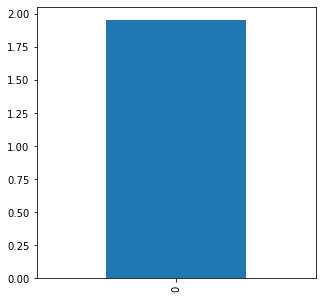

In [38]:
final_result = pd.DataFrame(result, columns = ["model_name", "RMSE", "crossrmsescore"])

final_result["RMSE"].tail().plot(kind = "bar", figsize = (5,5))

In [41]:
final_result

model_name      RMSE  crossrmsescore
0  VotingRegressor(estimators=[('DT', DecisionTre...  1.955346         4.32956

### XG Boost 

In [42]:
for i in [0.15, 0.16, 0.17,0.18,0.19,0.20,0.21, 0.22, 0.23, 0.24]:
    xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=i, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
    model_name, RMSE, crossrmsescore = run_model(xgb, train_X, train_y, test_X, sample,"Tumor_XGBoost_predictio.csv")

RMSE of Train Data =  2.553727230824886
Cross validation Score  =  4.163205784447531
RMSE of Train Data =  2.4582144368541314
Cross validation Score  =  4.168338839591324
RMSE of Train Data =  2.401490608261093
Cross validation Score  =  4.208310528157041
RMSE of Train Data =  2.3681737279482715
Cross validation Score  =  4.174616099631139
RMSE of Train Data =  2.3398173108117355
Cross validation Score  =  4.192262683625836
RMSE of Train Data =  2.244121530273222
Cross validation Score  =  4.212072463783353
RMSE of Train Data =  2.2027668401712943
Cross validation Score  =  4.231901777154255
RMSE of Train Data =  2.2368768452393435
Cross validation Score  =  4.2024596819005
RMSE of Train Data =  2.1184014295710307
Cross validation Score  =  4.246721521199065
RMSE of Train Data =  2.041730983498702
Cross validation Score  =  4.247800022858998


In [43]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.15, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
model_name, RMSE, crossrmsescore = run_model(xgb, train_X, train_y, test_X, sample,"Tumor_XGBoost_predictio.csv")

RMSE of Train Data =  2.553727230824886
Cross validation Score  =  4.163205784447531
